## Predictive Modeling for Transactional Risk and Anomalies
#### Author: Soheil Dejnabadi
#### Dataset: Khorasani, V. (2023). Bank Transaction Dataset for Fraud Detection. Kaggle. https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection

## Import Necessary Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Load the Dataset

We will load the dataset into a Pandas DataFrame and display the first few rows of it:

In [5]:
df = pd.read_csv('bank_transactions_data_2.csv')

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


## Explore the Dataset

#### Check Dataset Shape

We will check the shape of the dataset:

In [8]:
df.shape

(2512, 16)

#### Display Dataset Information

We will get information about columns, data types, and missing values:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

#### Basic Statistics

We will generate descriptive statistics for numerical and categorical columns:

In [12]:
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX000001,AC00362,NaN,2023-04-11 16:29:14,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


## Data Cleaning

#### Convert TransactionDate to Datetime

We will convert date columns to datetime format for time-based analysis:

In [15]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

#### Handle Missing Values

We will check for missing values and fill them using forward fill as an example:

In [17]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Although our current dataset doesn't contain missing values, it's important to be prepared for scenarios where they might occur. Here are two common approaches to handle missing data:
* Dropping rows with missing values: "df.dropna(inplace=True)"
* Filling missing values: "df.fillna(value, inplace=True)"

## Exploratory Data Analysis (EDA)

#### Transaction Amount Distribution
Visualize the distribution of transaction amounts to identify patterns or anomalies.

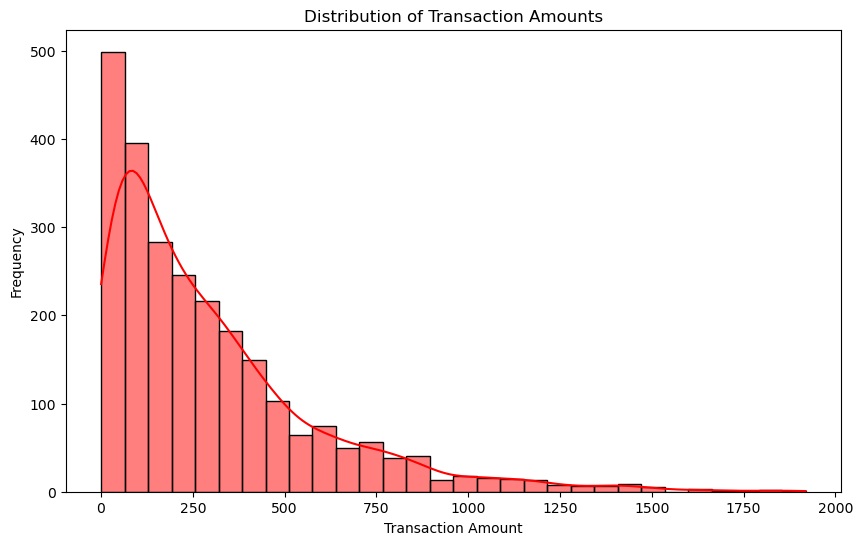

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount'], bins=30, kde=True, color='red')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

#### Transaction Amounts Over Time
Visualize how transaction amounts vary over time.

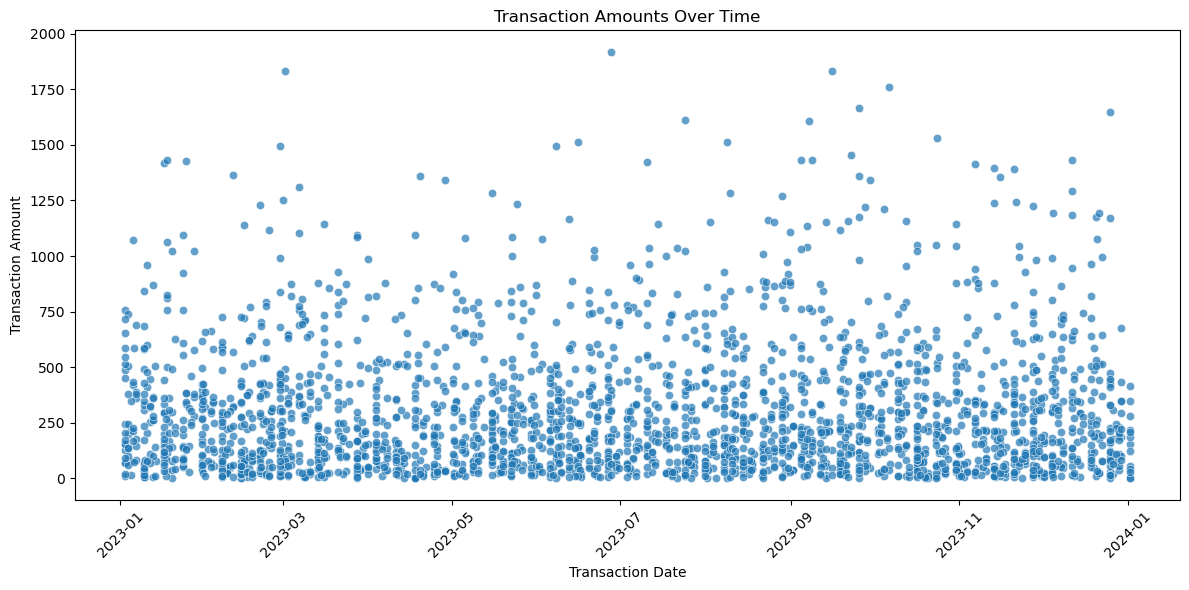

In [23]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='TransactionDate', y='TransactionAmount', alpha=0.7)
plt.title('Transaction Amounts Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Distribution of Transaction Types
Analyze how many transactions are of each type (Debit vs Credit).

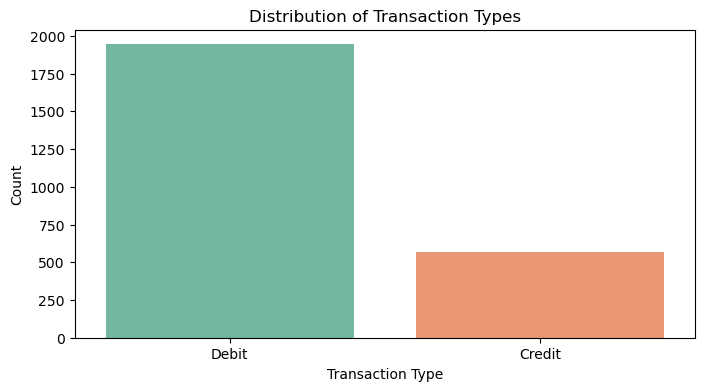

In [25]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='TransactionType', palette='Set2')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

#### Analyze Customer Age Distribution

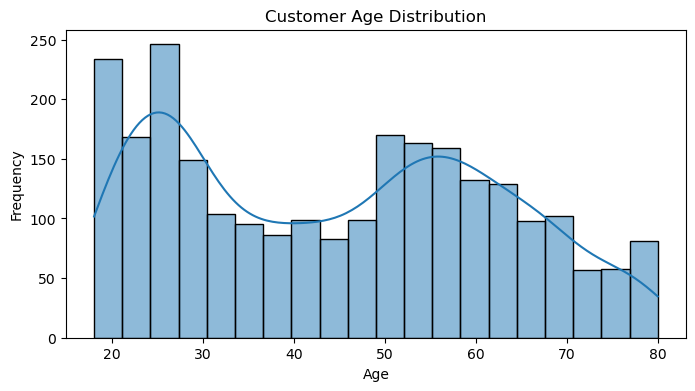

In [27]:
plt.figure(figsize=(8, 4))
sns.histplot(df['CustomerAge'], kde=True, bins=20)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Analyze Transaction Amount by Type

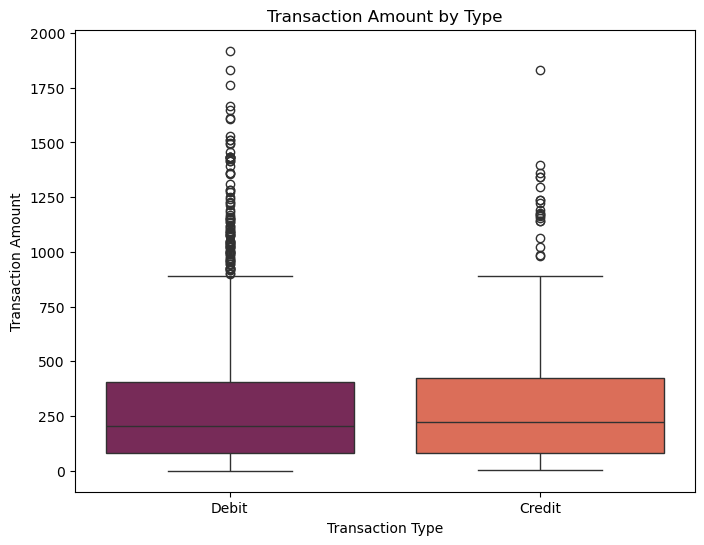

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='TransactionType', y='TransactionAmount', palette='rocket')
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

## Advanced Insights

#### Top Locations by Number of Transactions

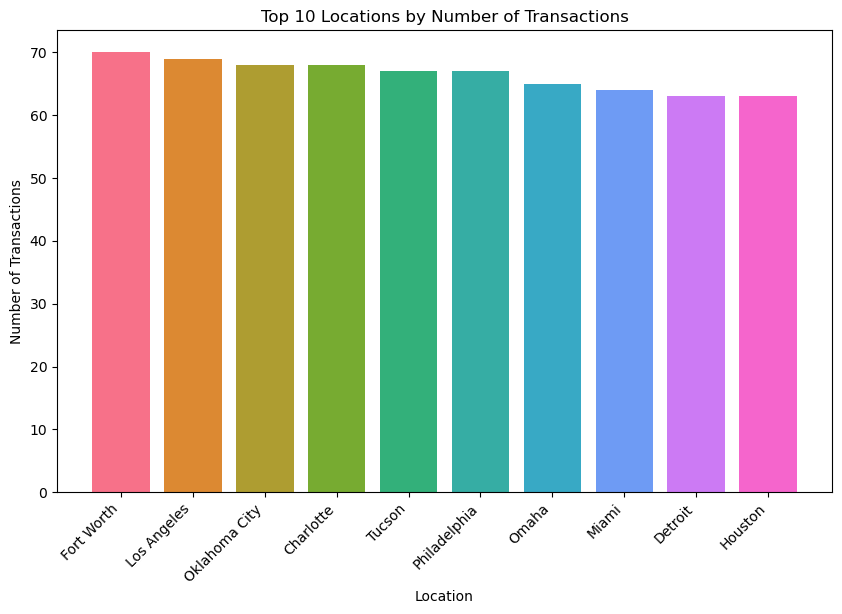

In [32]:
top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", 10)
bars = plt.bar(top_locations.index, top_locations.values, color=colors)
plt.title('Top 10 Locations by Number of Transactions')
plt.xlabel('Location')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


#### Correlation Heatmap
Identify relationships between numerical variables.

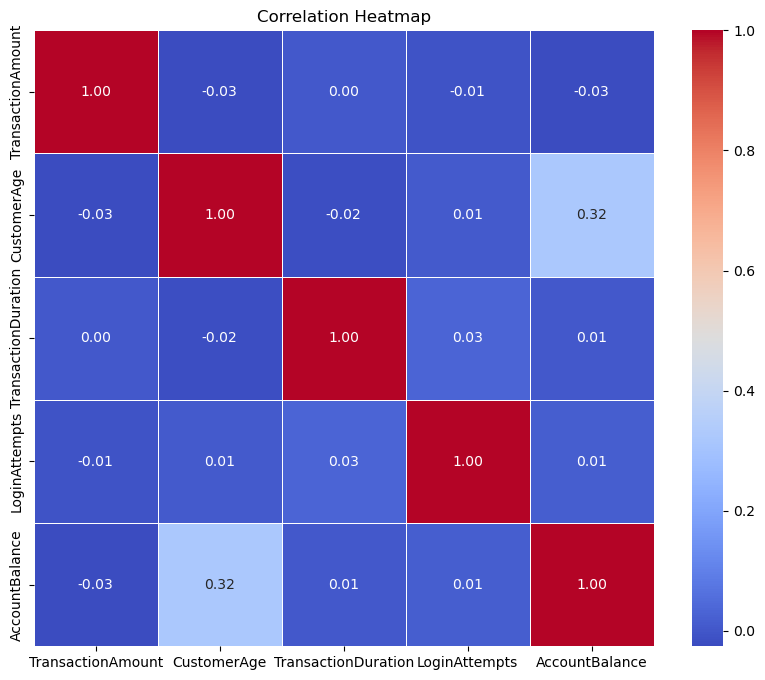

In [35]:
correlation_matrix = df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Identify potential fraudulent transactions using K-means clustering

#### Select Relevant Features
Select relevant numerical features for clustering.

In [38]:
features = df[['TransactionAmount', 'TransactionDuration']]

In [39]:
# Import Essential Libraries

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#### Standardize the Features
Standardize features to have zero mean and unit variance, which helps improve clustering performance.

In [41]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#### Apply K-means Clustering
Use the elbow method to determine the optimal number of clusters by plotting within-cluster sum of squares (WCSS). 

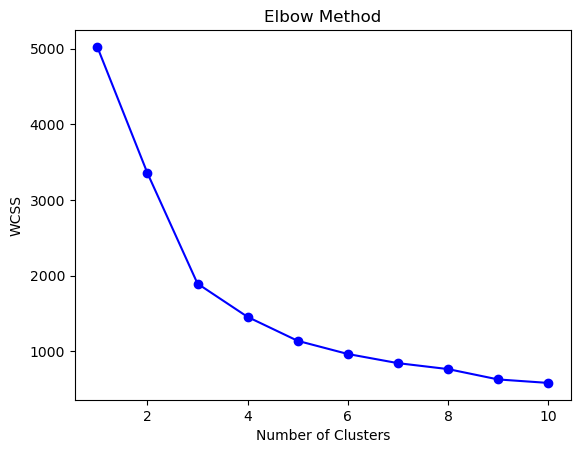

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Fit K-means with Optimal 
Fit K-means with the chosen number of clusters and assign cluster labels to each transaction.

In [45]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)
df['DistanceToCentroid'] = np.linalg.norm(features_scaled - kmeans.cluster_centers_[df['Cluster']], axis=1)

# Identify potential frauds based on distance threshold
threshold = df['DistanceToCentroid'].quantile(0.95)
potential_frauds = df[df['DistanceToCentroid'] > threshold]

print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds[['TransactionID', 'TransactionAmount', 'DistanceToCentroid', 'Cluster']])

Number of potential frauds detected: 126


,TransactionID,TransactionAmount,DistanceToCentroid,Cluster
74,TX000075,1212.51,1.876682,1
85,TX000086,1340.19,2.164769,1
141,TX000142,1049.92,1.559667,1
142,TX000143,227.14,1.507066,2
146,TX000147,973.39,2.648294,1
...,...,...,...,...
2403,TX002404,1493.00,2.376311,1
2414,TX002415,1664.33,2.991025,1
2439,TX002440,538.17,1.478480,2
2445,TX002446,403.01,1.558901,2


#### Analyze Clusters for Fraud Detection
Visualize clusters to identify patterns or anomalies that might indicate fraud.

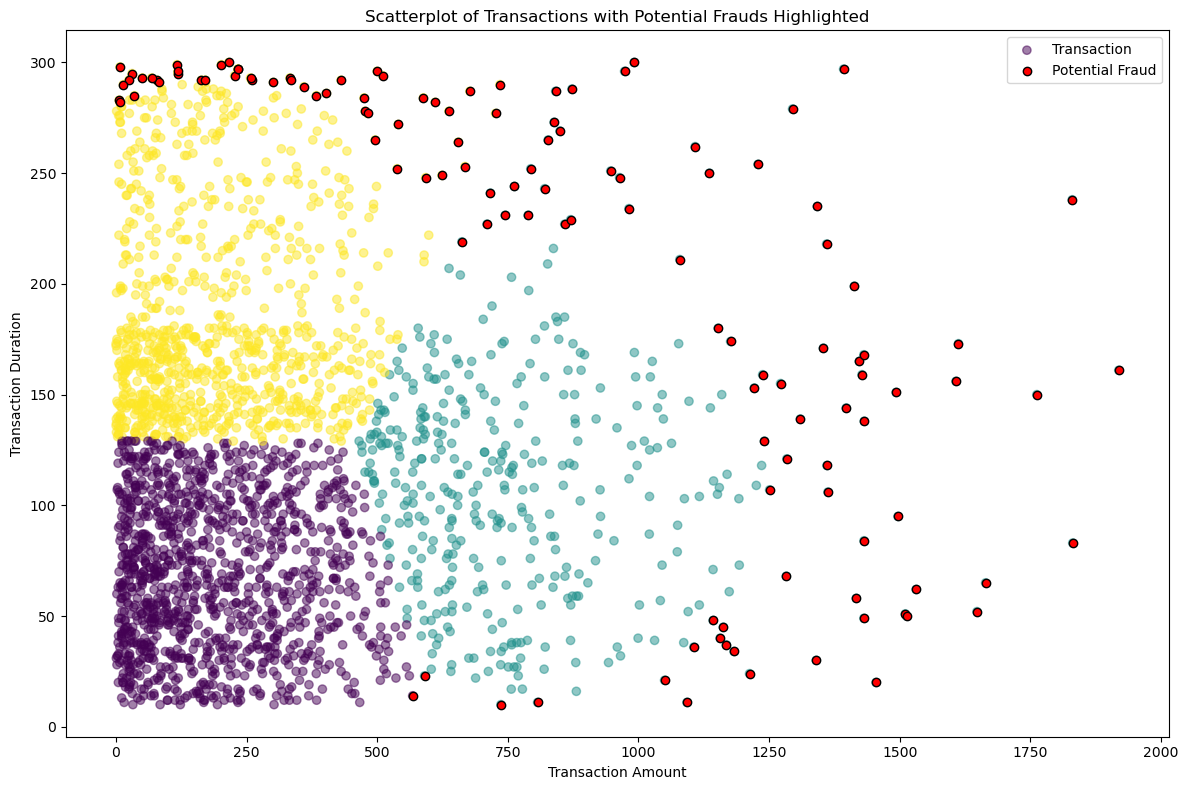

In [47]:
plt.figure(figsize=(12, 8))

# Scatter plot for all transactions
plt.scatter(df['TransactionAmount'], df['TransactionDuration'], c=df['Cluster'], cmap='viridis', alpha=0.5, label='Transaction')

# Highlight potential frauds
plt.scatter(potential_frauds['TransactionAmount'], potential_frauds['TransactionDuration'], color='red', label='Potential Fraud', edgecolor='k')

plt.title('Scatterplot of Transactions with Potential Frauds Highlighted')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Duration')
plt.legend()
plt.tight_layout()
plt.show()


## Identify potential fraudulent transactions using DBSCAN clustering

Use DBSCAN with a different set of features to identify density-based clusters.

In [50]:
# Import Essential Library 

from sklearn.cluster import DBSCAN

In [51]:
# Select different features for DBSCAN clustering
features_dbscan = df[['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']]

In [52]:
# Standardize these features to improve clustering performance.
scaler_dbscan = StandardScaler()
X_scaled_dbscan = scaler_dbscan.fit_transform(features_dbscan)

In [53]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled_dbscan)

In [84]:
# Initialize a mapping for clusters
cluster_labels = {
    -1: 'Fraud (Outliers)',
    0: 'Normal',
    1: 'Suspicious Group 1',
    2: 'Suspicious Group 2',
    3: 'Suspicious Group 3',
    4: 'Suspicious Group 4'
} 

# Create a new column 'Cluster_Description' based on the mapping
df['Cluster_Description'] = df['DBSCAN_Cluster'].map(cluster_labels)

# Define color map for clusters
color_map = {
    -1: 'red',
    0: 'blue',
    1: 'orange',
    2: 'green',
    3: 'purple',
    4: 'cyan'
}

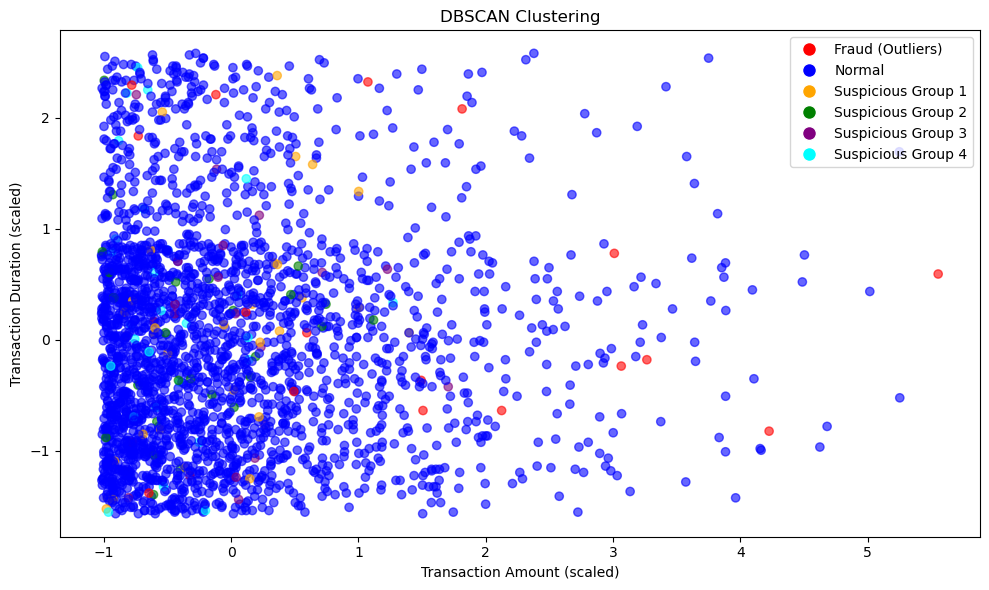

In [86]:
# Convert DBSCAN cluster labels to corresponding colors
colors = df['DBSCAN_Cluster'].map(lambda x: color_map.get(x, 'black'))

plt.figure(figsize=(10, 6)) 

plt.scatter(X_scaled_dbscan[:, 0], X_scaled_dbscan[:, 1], c=colors, alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('Transaction Amount (scaled)')
plt.ylabel('Transaction Duration (scaled)')

# Create a custom legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Fraud (Outliers)', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Suspicious Group 1', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Suspicious Group 2', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Suspicious Group 3', markerfacecolor='purple', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Suspicious Group 4', markerfacecolor='cyan', markersize=10)
]

plt.legend(handles=legend_elements)
plt.tight_layout()
plt.show()